In [1]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.datasets import fetch_california_housing, load_iris, load_wine, load_boston
from sklearn.model_selection import cross_val_score, ParameterSampler
from scipy.stats.distributions import uniform, randint
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

/Users/piotrgabrys/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data = fetch_california_housing()
x = pd.DataFrame(data['data'])
y = pd.DataFrame(data['target'])

x = x.sample(n=x.shape[0], random_state=42)
y = y.loc[x.index]

In [71]:
params_distribution = {'n_estimators': randint(2,100),
                       'max_depth': randint(2,200),
                       'learning_rate': uniform(.001, .2),
                       'colsample_bytree': uniform(.5, 0.5),
                       'num_leaves': randint(2,100)}

ps = ParameterSampler(params_distribution, 50, random_state=42)
model = LGBMRegressor()
cross_val_scores_list = []

for params in tqdm_notebook(ps):
    
    model.set_params(**params)

    cross_val_scores = cross_val_score(model, x, y, cv=12, scoring='neg_mean_squared_error')
    cross_val_scores_list.append(cross_val_scores)

In [103]:
scores_array = np.array(cross_val_scores_list)
scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(12)]
scores_cumulative = np.array(scores_cumulative)

corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4))
corrs

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0000,0.9999,0.9999,0.9999,0.9999,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998,0.9998
1,0.9999,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999
2,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9999,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9999,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


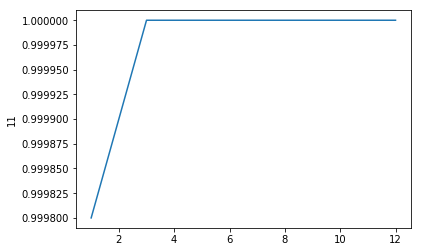

In [104]:
sns.lineplot(x=range(1,13), y=corrs.iloc[:,-1]);

In [111]:
iris = load_iris()
x_iris = pd.DataFrame(iris['data'])
y_iris = pd.Series(iris['target'])

x_iris = x_iris.sample(n=x_iris.shape[0], random_state=42)
y_iris = y_iris.loc[x_iris.index]

In [115]:
params_distribution = {'n_estimators': randint(2,100),
                       'max_depth': randint(2,200),
                       'learning_rate': uniform(.001, .2),
                       'colsample_bytree': uniform(.5, 0.5),
                       'num_leaves': randint(2,100)}

ps = ParameterSampler(params_distribution, 200, random_state=42)
model = LGBMClassifier()
cross_val_scores_list = []

for params in tqdm_notebook(ps):
    
    model.set_params(**params)

    cross_val_scores = cross_val_score(model, x_iris, y_iris, cv=8, scoring='neg_mean_squared_error')
    cross_val_scores_list.append(cross_val_scores)

In [121]:
scores_array = np.array(cross_val_scores_list)
scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(8)]
scores_cumulative = np.array(scores_cumulative)

corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4), 
                     columns=[i for i in range(1,9)], 
                     index=[i for i in range(1,9)])
corrs

,1,2,3,4,5,6,7,8
1,1.0000,0.9139,0.9139,0.6674,0.4808,0.4868,0.4268,0.3686
2,0.9139,1.0000,1.0000,0.8415,0.6675,0.6160,0.5332,0.4649
3,0.9139,1.0000,1.0000,0.8415,0.6675,0.6160,0.5332,0.4649
4,0.6674,0.8415,0.8415,1.0000,0.7304,0.6306,0.5076,0.4874
5,0.4808,0.6675,0.6675,0.7304,1.0000,0.8300,0.7429,0.6926
6,0.4868,0.6160,0.6160,0.6306,0.8300,1.0000,0.9682,0.9388
7,0.4268,0.5332,0.5332,0.5076,0.7429,0.9682,1.0000,0.9662
8,0.3686,0.4649,0.4649,0.4874,0.6926,0.9388,0.9662,1.0000


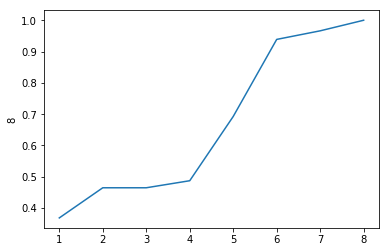

In [122]:
sns.lineplot(x=range(1,9), y=corrs.iloc[:,-1]);

In [124]:
wine = load_wine()
x_wine = pd.DataFrame(wine['data'])
y_wine = pd.Series(wine['target'])

x_wine = x_wine.sample(n=x_wine.shape[0], random_state=42)
y_wine = y_wine.loc[x_wine.index]

In [127]:
params_distribution = {'n_estimators': randint(2,100),
                       'max_depth': randint(2,200),
                       'learning_rate': uniform(.001, .2),
                       'colsample_bytree': uniform(.5, 0.5),
                       'num_leaves': randint(2,100)}

ps = ParameterSampler(params_distribution, 200, random_state=42)
model = LGBMClassifier()
cross_val_scores_list = []

for params in tqdm_notebook(ps):
    
    model.set_params(**params)

    cross_val_scores = cross_val_score(model, x_wine, y_wine, cv=8, scoring='neg_mean_squared_error')
    cross_val_scores_list.append(cross_val_scores)

scores_array = np.array(cross_val_scores_list)
scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(8)]
scores_cumulative = np.array(scores_cumulative)

corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4), 
                     columns=[i for i in range(1,9)], 
                     index=[i for i in range(1,9)])
corrs

,1,2,3,4,5,6,7,8
1,1.0000,0.9658,0.9258,0.9075,0.8819,0.8607,0.8518,0.8634
2,0.9658,1.0000,0.9899,0.9816,0.9690,0.9572,0.9526,0.9597
3,0.9258,0.9899,1.0000,0.9974,0.9917,0.9854,0.9826,0.9867
4,0.9075,0.9816,0.9974,1.0000,0.9971,0.9929,0.9907,0.9936
5,0.8819,0.9690,0.9917,0.9971,1.0000,0.9979,0.9966,0.9980
6,0.8607,0.9572,0.9854,0.9929,0.9979,1.0000,0.9995,0.9993
7,0.8518,0.9526,0.9826,0.9907,0.9966,0.9995,1.0000,0.9993
8,0.8634,0.9597,0.9867,0.9936,0.9980,0.9993,0.9993,1.0000


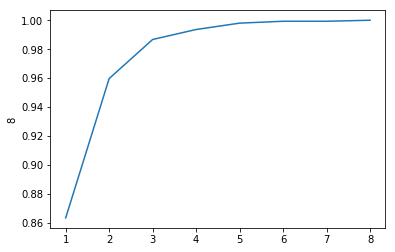

In [128]:
sns.lineplot(x=range(1,9), y=corrs.iloc[:,-1]);

In [137]:
boston = load_boston()

x_boston = pd.DataFrame(boston['data'])
y_boston = pd.Series(boston['target'])

x_boston = x_boston.sample(n=x_boston.shape[0], random_state=42)
y_boston = y_boston.loc[x_boston.index]

In [139]:
params_distribution = {'n_estimators': randint(2,100),
                       'max_depth': randint(2,200),
                       'learning_rate': uniform(.001, .2),
                       'colsample_bytree': uniform(.5, 0.5),
                       'num_leaves': randint(2,100)}

ps = ParameterSampler(params_distribution, 200, random_state=42)
model = LGBMRegressor()
cross_val_scores_list = []

for params in tqdm_notebook(ps):
    
    model.set_params(**params)

    cross_val_scores = cross_val_score(model, x_boston, y_boston, cv=8, scoring='neg_mean_squared_error')
    cross_val_scores_list.append(cross_val_scores)

scores_array = np.array(cross_val_scores_list)
scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(8)]
scores_cumulative = np.array(scores_cumulative)

corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4), 
                     columns=[i for i in range(1,9)], 
                     index=[i for i in range(1,9)])
corrs

,1,2,3,4,5,6,7,8
1,1.0000,0.9969,0.9967,0.9983,0.9986,0.9988,0.9988,0.9986
2,0.9969,1.0000,0.9998,0.9996,0.9993,0.9991,0.9991,0.9992
3,0.9967,0.9998,1.0000,0.9995,0.9993,0.9991,0.9991,0.9993
4,0.9983,0.9996,0.9995,1.0000,0.9999,0.9998,0.9998,0.9999
5,0.9986,0.9993,0.9993,0.9999,1.0000,0.9999,0.9999,0.9999
6,0.9988,0.9991,0.9991,0.9998,0.9999,1.0000,1.0000,0.9999
7,0.9988,0.9991,0.9991,0.9998,0.9999,1.0000,1.0000,1.0000
8,0.9986,0.9992,0.9993,0.9999,0.9999,0.9999,1.0000,1.0000


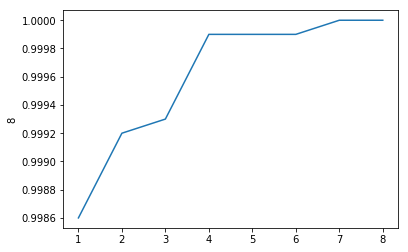

In [140]:
sns.lineplot(x=range(1,9), y=corrs.iloc[:,-1]);